# Referências usadas durante a análise:<b>
https://www.datacamp.com/community/tutorials/exploratory-data-analysis-python#eda

# Pontos que gostaria de entender e analisar
- Há correlação nas vendas dos itens numa mesma loja?
    - Se sim, isso é observado em mais lojas?
- Há correlação entre as vendas das lojas?
    - Se sim, os itens vendidos nessas lojas são os mesmos? (ou categorias)
- Qual a influência das vendas do mês anterior no mês atual?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from datetime import datetime
%matplotlib inline
import os

In [2]:
import seaborn as sns

In [3]:
cwd = os.getcwd()

In [4]:
print(cwd)

C:\Users\Victor Nakajima\Documents\GitHub\studygroup\kaggle - predict future sales


In [5]:
# Tabelas com as descrições
PATH = os.path.join('Data')
dfItems = pd.read_csv(PATH + '\items.csv')
# dfItemCategories = pd.read_csv('competitive-data-science-predict-future-sales/item_categories.csv')
# dfShops = pd.read_csv('competitive-data-science-predict-future-sales/shops.csv')

In [6]:
dfItems.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [7]:
%%time
# quantidade de categorias diferentes
len(pd.unique(dfItems.item_category_id))

Wall time: 3 ms


84

In [8]:
dfItems.item_category_id.value_counts() # categorias com mais itens

40    5035
55    2365
37    1780
31    1125
58     790
30     756
72     666
19     628
61     598
23     501
43     471
57     427
56     397
67     394
63     366
76     333
41     332
69     317
38     310
62     295
59     294
64     290
78     278
75     277
28     240
70     228
77     220
45     195
66     178
20     175
      ... 
4       15
83      15
42      12
9       12
46      12
8        9
82       8
34       8
27       8
74       8
17       7
81       7
39       7
71       6
36       6
32       6
80       6
18       6
13       6
48       5
0        4
35       4
52       3
53       3
26       3
50       2
1        2
51       1
10       1
79       1
Name: item_category_id, Length: 84, dtype: int64

In [9]:
figsize = (15, 8.27)

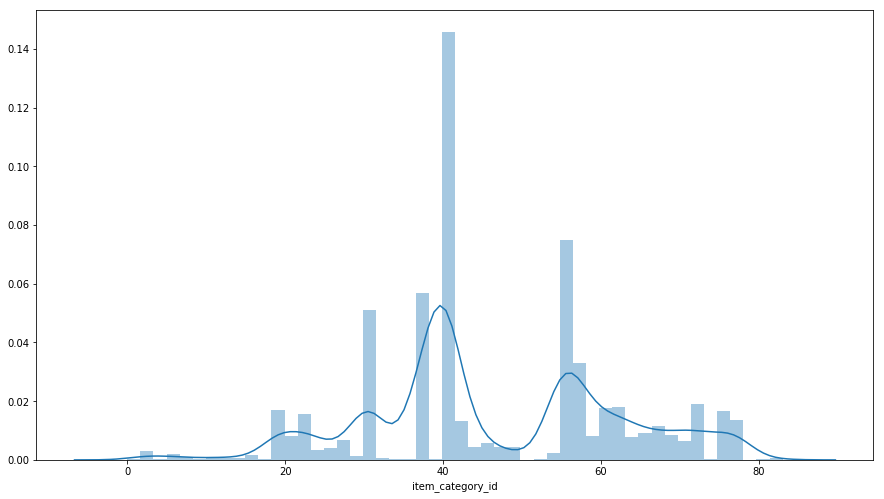

In [10]:
plt.subplots(figsize=figsize)
sns.distplot( dfItems["item_category_id"]) #distribuição das categorias

In [11]:
%%time
# Carregando os Dados , o argumento parse_dates ja transforma o campo 'date' no formato de data. Isso deixa a importação
# devagar. 
# dfSalesTrain = pd.read_csv('competitive-data-science-predict-future-sales/sales_train.csv.gz', parse_dates=['date'])

# Enquanto não estiver usando essa coluna com a função de data, vou deixá-la como string (5m x 3 segundos)

dfSalesTrain = pd.read_csv(PATH + '/sales_train.csv.gz')

Wall time: 3.75 s


In [12]:
# Valores das features
dfSalesTrain.columns.tolist()

['date', 'date_block_num', 'shop_id', 'item_id', 'item_price', 'item_cnt_day']

### Descrição das colunas

<b>date</b>: data em que a venda ocorreu <br>
<b>date_block_num</b>: é o índice de meses e anos (jan/2013 = 0, fev/2013 = 1,...)<br>
<b>shop_id</b>: código de identificação da loja<br>
<b>item_id</b>: código de identificação do item<br>
<b>item_price</b>: preço do item<br>
<b>item_cont_day</b>: quiantidade vendida de itens no dia

Aqui faz sentido criar uma nova coluna em que os preços são multiplicados pelas quantidades. A ideia por trás é poder fazer agrupamentos por meses ao invés de dias.<br>
<b>total_sales</b>: é o resultado da qtd x preço

In [13]:
dfSalesTrain['total_sales'] = dfSalesTrain['item_price'] * dfSalesTrain['item_cnt_day']

In [14]:
dfSalesTrain.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,total_sales
0,02.01.2013,0,59,22154,999.00,1.0,999.00
1,03.01.2013,0,25,2552,899.00,1.0,899.00
2,05.01.2013,0,25,2552,899.00,-1.0,-899.00
3,06.01.2013,0,25,2554,1709.05,1.0,1709.05
4,15.01.2013,0,25,2555,1099.00,1.0,1099.00


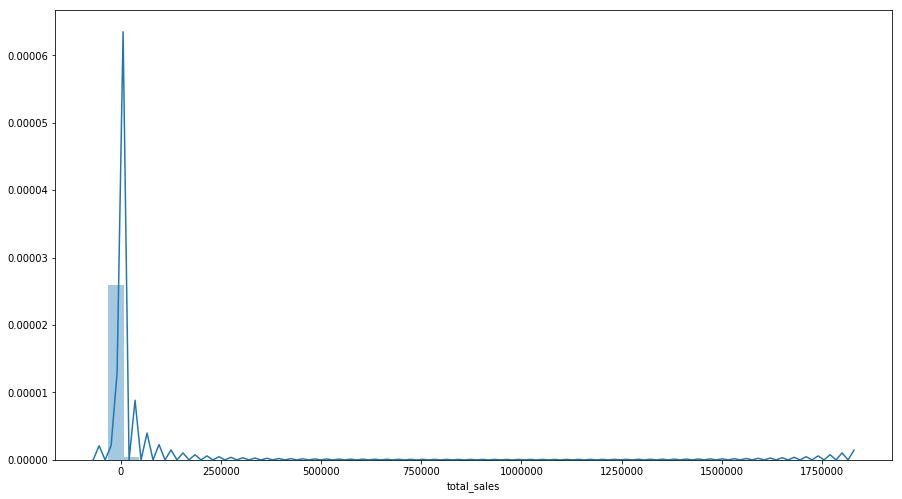

In [15]:
plt.subplots(figsize=figsize)
sns.distplot( dfSalesTrain["total_sales"]) #distribuição itens vendidos dia

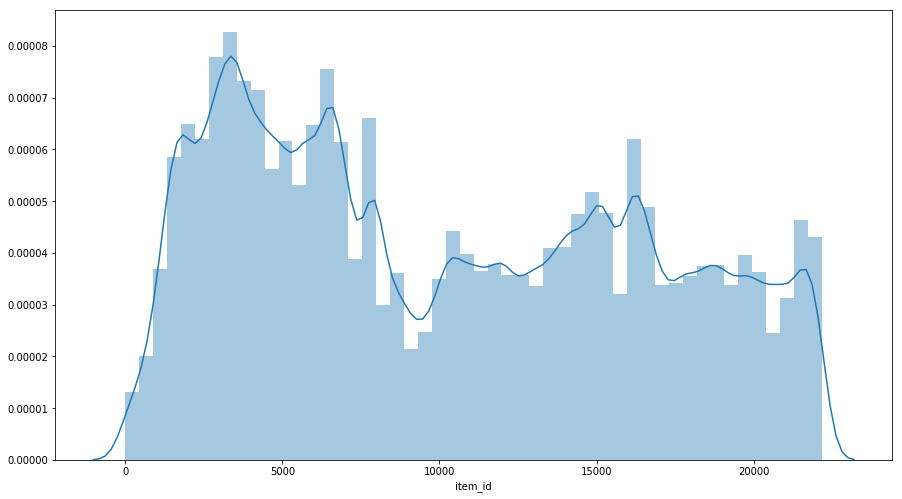

In [16]:
plt.subplots(figsize=figsize)
sns.distplot( dfSalesTrain["item_id"]) #distribuição dos itens

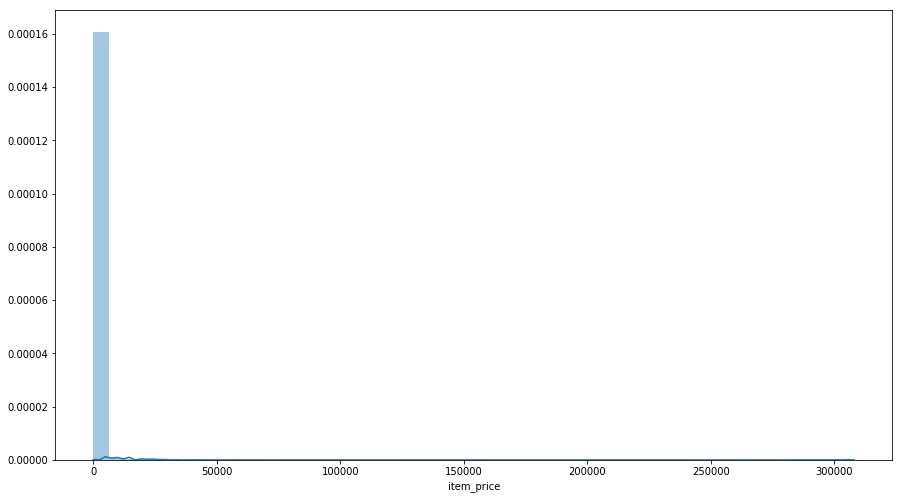

In [17]:
plt.subplots(figsize=figsize)
sns.distplot( dfSalesTrain["item_price"]) #distribuição preços

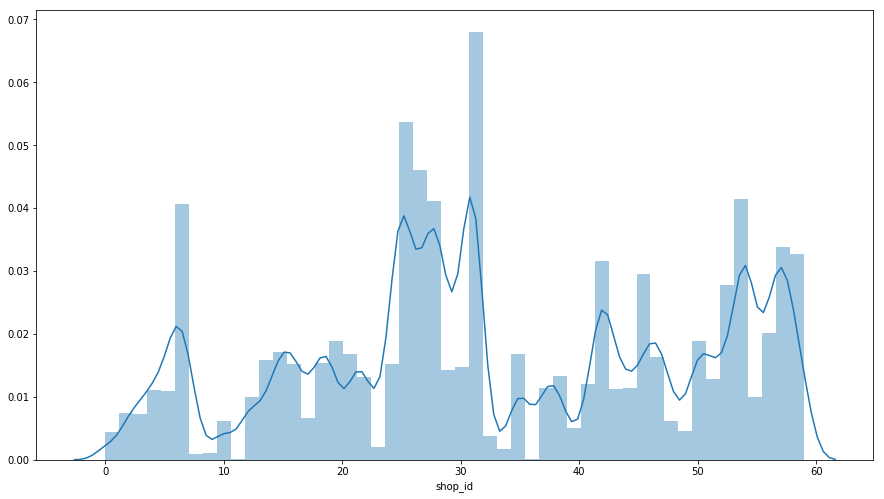

In [18]:
plt.subplots(figsize=figsize)
sns.distplot( dfSalesTrain["shop_id"]) #distribuição das lojas

### Alguns checks de sanidade:
- Há algum preço negativo?
- Há quantidade negativa? Sim, nesse caso se refere à devoluções.

In [19]:
dfSalesTrain[dfSalesTrain.item_price < 0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,total_sales
484683,15.05.2013,4,32,2973,-1.0,1.0,-1.0


### Dando merge com a tabela de categoria.

In [20]:
# Adicionando colunas item_category_id ao dataFrame
dfSalesTrain = dfSalesTrain.merge(dfItems, on='item_id')
dfSalesTrain = dfSalesTrain.drop(['item_name'], axis=1)
# dfItems.columns
dfSalesTrain.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,total_sales,item_category_id
0,02.01.2013,0,59,22154,999.0,1.0,999.0,37
1,23.01.2013,0,24,22154,999.0,1.0,999.0,37
2,20.01.2013,0,27,22154,999.0,1.0,999.0,37
3,02.01.2013,0,25,22154,999.0,1.0,999.0,37
4,03.01.2013,0,25,22154,999.0,1.0,999.0,37


### Descobrir se temos itens negativos

In [70]:
dfSalesTrain.item_cnt_day.describe(percentiles=[.1,.2,.3,.4,.5,.6,.7,.8,.9])

count    2.935849e+06
mean     1.242641e+00
std      2.618834e+00
min     -2.200000e+01
10%      1.000000e+00
20%      1.000000e+00
30%      1.000000e+00
40%      1.000000e+00
50%      1.000000e+00
60%      1.000000e+00
70%      1.000000e+00
80%      1.000000e+00
90%      2.000000e+00
max      2.169000e+03
Name: item_cnt_day, dtype: float64

In [76]:
dfSalesTrain_neg = dfSalesTrain[dfSalesTrain['item_cnt_day'] < 1] # todos os valores negativos

In [77]:
dfSalesTrain_neg.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7356 entries, 60 to 2935837
Data columns (total 8 columns):
date                7356 non-null object
date_block_num      7356 non-null int64
shop_id             7356 non-null int64
item_id             7356 non-null int64
item_price          7356 non-null float64
item_cnt_day        7356 non-null float64
total_sales         7356 non-null float64
item_category_id    7356 non-null int64
dtypes: float64(3), int64(4), object(1)
memory usage: 517.2+ KB


In [90]:
'Porcentagem de negativos {}'.format(str(len(dfSalesTrain_neg) / len(dfSalesTrain)))

'Porcentagem de negativos 0.0025055784544777337'

In [25]:
dfSalesTrain[dfSalesTrain['item_id'] == 1590] # exemlpo de um item negativo

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,total_sales,item_category_id
1176637,10.01.2013,0,8,1590,2599.0,1.0,2599.0,29
1176638,10.01.2013,0,12,1590,2599.0,-5.0,-12995.0,29
1176639,18.01.2013,0,12,1590,2599.0,-6.0,-15594.0,29
1176640,23.01.2013,0,12,1590,2599.0,-1.0,-2599.0,29
1176641,29.01.2013,0,12,1590,2599.0,-1.0,-2599.0,29
1176642,16.02.2013,1,12,1590,2599.0,1.0,2599.0,29
1176643,07.03.2013,2,12,1590,2599.0,1.0,2599.0,29
1176644,08.08.2013,7,12,1590,2599.0,-1.0,-2599.0,29


In [63]:
dfSalesTrain.item_cnt_day.min()

-22.0

(-22, 10)

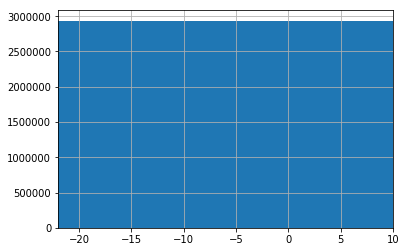

In [65]:
dfSalesTrain.item_cnt_day.hist(bins=10)
plt.xlim(-22,10)

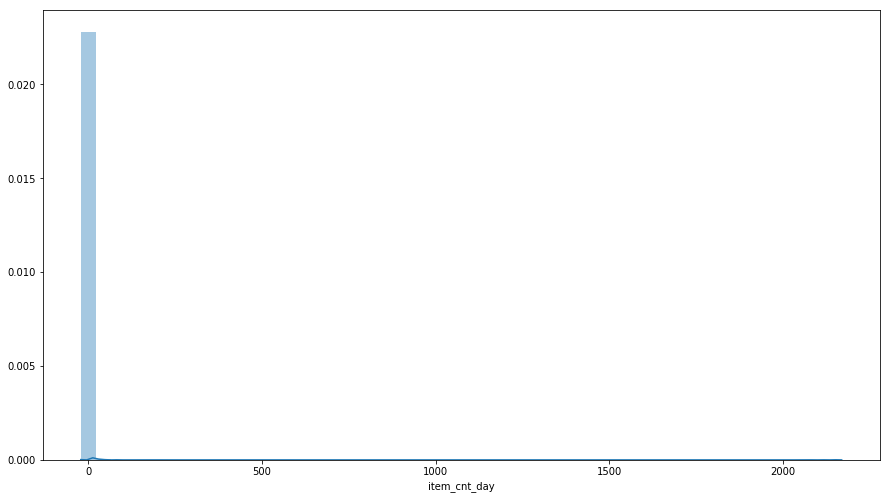

In [29]:
plt.subplots(figsize=figsize)
sns.distplot( dfSalesTrain["item_cnt_day"]) 

### Tentar investigar os intens devolvidos

In [21]:
df_cnt_dat_neg = dfSalesTrain.groupby(['shop_id', 'item_id'])[['item_cnt_day']].sum() # lojas que tem problemas com devolução

In [32]:
df_cnt_dat_neg2 = dfSalesTrain.groupby(['shop_id', 'item_id'])['item_cnt_day'].sum()

In [33]:
type(df_cnt_dat_neg2)

pandas.core.series.Series

In [34]:
df_cnt_dat_neg2.head()

shop_id  item_id
0        30         31.0
         31         11.0
         32         16.0
         33          6.0
         35         15.0
Name: item_cnt_day, dtype: float64

In [24]:
df_cnt_dat_neg.sort_values(by = 'item_cnt_day')

item_cnt_day
shop_id item_id              
12      1590            -12.0
        1593             -7.0
32      6664             -1.0
37      9601             -1.0
12      15435            -1.0
        9483             -1.0
59      13501            -1.0
42      13474            -1.0
22      9255             -1.0
12      8200             -1.0
        9999             -1.0
53      14503            -1.0
16      13477            -1.0
        11871            -1.0
54      8585             -1.0
12      19360            -1.0
46      13473            -1.0
44      13419            -1.0
16      18062            -1.0
47      11031            -1.0
12      11777            -1.0
38      8515             -1.0
4       12211            -1.0
28      8775             -1.0
41      6664             -1.0
18      17407            -1.0
12      1592             -1.0
47      11259             0.0
52      2225              0.0
44      6721              0.0
...                       ...
4       20949          2465.0
50      20949          2544.0
12      11369          2688.0
37      20949          2727.0
18      20949          2826.0
15      20949          2907.0
24      20949          2918.0
58      20949          2928.0
14      20949          3219.0
7       20949          3321.0
16      20949          3395.0
35      20949          3434.0
56      20949          3439.0
53      20949          3540.0
6       20949          3551.0
26      20949          3624.0
46      20949          3891.0
30      20949          3922.0
21      20949          4335.0
22      20949          4382.0
47      20949          4530.0
57      20949          6116.0
12      11370          6163.0
        11373          6563.0
27      20949          8265.0
42      20949         10514.0
54      20949         12323.0
28      20949         13458.0
25      20949         14343.0
31      20949         19934.0

[424124 rows x 1 columns]

In [71]:
df_so_neg = df_cnt_dat_neg[df_cnt_dat_neg['item_cnt_day'] < 0] #selecionar os valores negativos

In [74]:
df_so_neg.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 27 entries, (4, 12211) to (59, 13501)
Data columns (total 1 columns):
item_cnt_day    27 non-null float64
dtypes: float64(1)
memory usage: 171.3 KB


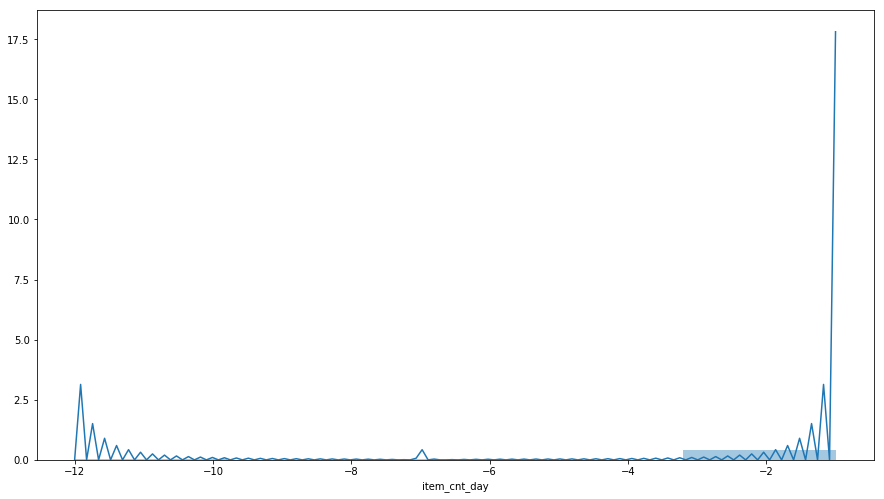

In [75]:
plt.subplots(figsize=figsize)
sns.distplot( df_so_neg["item_cnt_day"]) #distribuição dos valores negativos

(array([ 115690.,  108613.,  121347.,   94109.,   91759.,  100403.,
         100548.,  104772.,   96137.,   94202.,   96736.,  143246.,
          99349.,   89830.,   92733.,   77906.,   78529.,   82408.,
          78760.,   86614.,   73157.,   79361.,   86428.,  130786.,
          88522.,   71808.,   69977.,   56274.,   54548.,   54617.,
          55549.,   57029.,  104102.]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
         33.]),
 <a list of 33 Patch objects>)

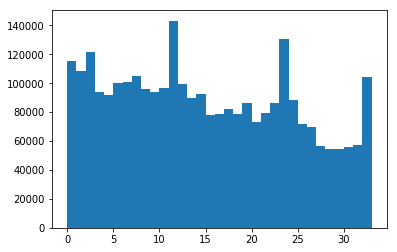

In [60]:
plt.hist(dfSalesTrain.date_block_num, bins=33)


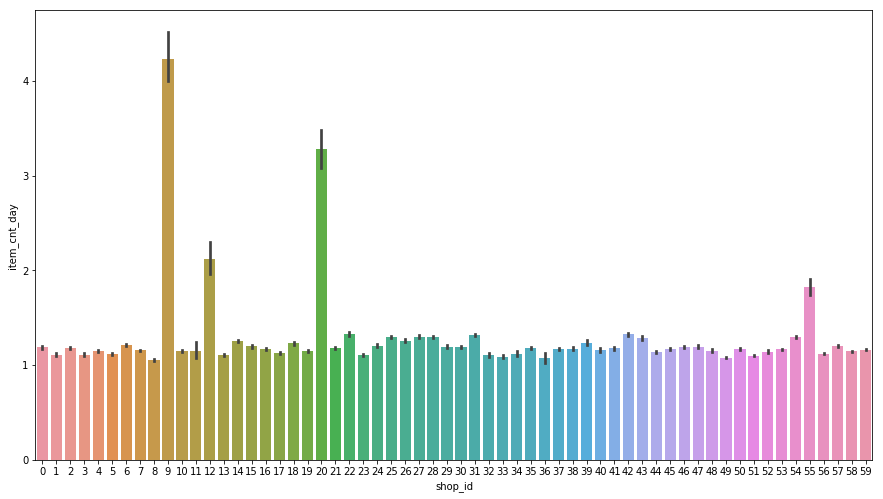

In [28]:
fig = plt.subplots(figsize=a4_dims)
sns.barplot(x='shop_id', y='item_cnt_day',data=dfSalesTrain)

In [30]:
dfSalesTrain[dfSalesTrain['shop_id'] == 12].describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,total_sales,item_category_id
count,34694.000000,34694.0,34694.000000,34694.000000,34694.000000,3.469400e+04,34694.000000
mean,17.484407,12.0,9891.584770,1464.391142,2.117888,3.234135e+03,39.236064
std,9.643071,0.0,6481.179913,3142.064428,16.500692,2.490204e+04,20.451698
min,0.000000,12.0,27.000000,0.908714,-22.000000,-6.897000e+04,2.000000
25%,10.000000,12.0,3938.000000,300.000000,1.000000,3.490000e+02,23.000000
50%,18.000000,12.0,9396.000000,720.000000,1.000000,8.970000e+02,37.000000
75%,25.000000,12.0,15270.000000,1699.000000,1.000000,1.999000e+03,55.000000
max,33.000000,12.0,22168.000000,307980.000000,2169.000000,1.518190e+06,83.000000


In [31]:
# dfSalesGroupCatShop = dfSalesTrain.groupby(['item_category_id','shop_id'])[['item_cnt_day', 'item_price', 'total_sales']].sum()
dfSalesGroupCatShop = dfSalesTrain.groupby(['item_category_id_y','shop_id'], as_index=False)[['total_sales']].sum()

KeyError: 'item_category_id_y'

In [ ]:
type(dfSalesGroupCatShop)

In [ ]:
# Verificar quais categorias possuem maior número de vendas, por loja
dfSalesGroupCatShop.nlargest(10, 'total_sales')

In [ ]:
# Analisar as dispersões dos preços vendidos
dfItemId = dfSalesTrain[dfSalesTrain['item_category_id_y'] == 20]
dfItemId.head()

In [ ]:
# iniciar a análise exploratória dos dados (EDA)
# nesse caso, para a categoria 40
dfItemId.describe()

Pontos interessantes:<br>
 - O preço médio dessa categoria é \$2791,80, o seu desvio padrão é \$1143,37, o preço mínimo é \$21 e o máximo \$9999 <br>
 
 Há uma diferença de valores por item bastante grande. Vamos tentar analisar por produto.

In [ ]:
len(dfItemId['item_id'].unique())

In [ ]:
dfItemIdGroup = dfItemId.groupby(['item_id'])['total_sales'].sum()
dfItemIdGroup.nlargest(10)

In [ ]:
dfItemSelectedId = dfItemId[dfItemId['item_id'] == 3733]
dfItemSelectedId.describe()

    Aqui temos que o item de ID \#3733 da categoria \#20 tem preço máximo de \$5799, mínimo de \$2248 e médio de \$3893. Vamos plotar um gráfico para ver essa dispersão total

In [ ]:
a4_dims = (15, 8.27)
dfItemSelectedId.boxplot(column='item_price',by='shop_id', figsize=a4_dims)

In [ ]:
dfItemSelectedId.nsmallest(10, 'item_price')